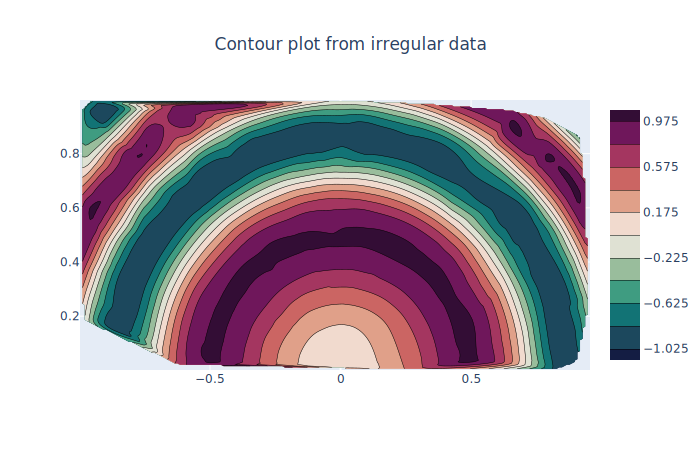

In [1]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata
from typing import Tuple

np.random.seed(1273)

_num = 200
# generate irregular data
x = -1 + 2 * np.random.rand(_num)
y = np.random.rand(_num)
# z-values at the irregular data
z = np.sin(np.pi * 2 * (x * x + y * y))


def create_grid_mesh(
    x_vals: np.ndarray,
    y_vals: np.ndarray,
    z_vals: np.ndarray,
    nums: Tuple[float, float],
    x_bound: Tuple[float, float] = None,
    y_bound: Tuple[float, float] = None,
):
    if x_bound is None:
        x_bound = x_vals.min(), x_vals.max()
    if y_bound is None:
        y_bound = y_vals.min(), y_vals.max()
    # Define a regular grid over the data
    xr = np.linspace(x_bound[0], x_bound[1], nums[0])
    yr = np.linspace(y_bound[0], y_bound[1], nums[1])
    xr, yr = np.meshgrid(xr, yr)

    # evaluate the z-values at the regular grid through cubic interpolation
    Z = griddata(
        (x_vals, y_vals),
        z_vals,
        (xr, yr),
        # method="nearest",
        method="cubic",
    )
    return xr[0, :], yr[:, 0], Z


xx, yy, zz = create_grid_mesh(x, y, z, nums=(200, 200))

fig = go.Figure(
    go.Contour(
        x=xx,
        y=yy,
        z=zz,
        colorscale="curl",
        contours=dict(start=np.nanmin(zz), end=np.nanmax(zz), size=0.2),
    )
)
fig.update_layout(
    title_text="Contour plot from irregular data", title_x=0.5, width=600, height=400
)
fig.show(renderer="svg")